In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import amazon_processor

import pathlib
import os
import sys

In [2]:
# Custom functions
import pathlib
import os
import sys

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/amazon', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1']


In [3]:
datapath_train = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.lrn.csv")
display(datapath_train)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.lrn.csv')

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)

df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,8,6,10,6,7,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,Chell
1,13,1,13,9,8,8,2,3,2,4,...,4,1,2,1,0,1,0,0,0,Engineer
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,1,0,0,0,0,Grove
3,8,11,10,11,3,7,0,4,2,1,...,0,0,1,0,0,0,2,1,0,Davisson
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,1,0,0,1,0,1,0,0,Riley
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,1,0,0,0,1,Neal
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,1,1,0,4,Messick
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,2,0,0,0,Mitchell


# Data explenarision

It containt of numerical values with no missing values. The column "Class" is dividet into 50 different names.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10001 entries, V1 to Class
dtypes: int64(10000), object(1)
memory usage: 57.2+ MB


In [6]:
count_classes = df_train["Class"].value_counts()
count_classes

Chell          21
Hayes          20
Lovitt         19
Chachra        19
Agresti        18
Shea           18
Mahlers2nd     18
Lee            18
Peterson       17
Ashbacher      17
Morrison       17
Nigam          17
Davisson       17
Mark           17
Cholette       17
McKee          16
Merritt        16
Riley          16
Auken          16
Calvinnme      16
Robert         16
Grove          16
Harp           16
Janson         16
Neal           16
Kolln          15
Vernon         15
Comdet         15
Sherwin        15
Cutey          15
Messick        14
Blankenship    14
Bukowsky       14
Koenig         14
Corn           14
Walters        13
Taylor         13
Lawyeraau      13
Chandler       13
Mitchell       13
Power          13
Engineer       12
Goonan         12
Dent           12
Brown          11
Wilson         11
Brody          11
Vision         10
Johnson        10
CFH             8
Name: Class, dtype: int64

In [7]:
cleaned = df_train[~df_train['Class'].isin(
["Chell",
"Hayes",
"Chachra",        
"Lovitt",         
"Mahlers2nd",     
"Shea",           
"Lee",            
"Agresti",        
"Mark",           
"Morrison",       
"Cholette",       
"Nigam",         
"Peterson",       
"Davisson",       
"Ashbacher",      
"Grove",          
"Neal",           
"Robert",         
"Calvinnme",      
"Harp",           
"McKee",          
"Riley",         
"Merritt",       
"Auken",          
"Janson"])]

In [ ]:
def PlotHist(df,ylabel,xlabel,title,savename,bins,size):
    mpl.style.use('seaborn')
    plt.rc('xtick', labelsize=size) 
    plt.rc('ytick', labelsize=size) 
    fig = plt.figure(figsize=(40,12))
    plt.grid()
    plt.ylabel(ylabel, fontsize=size)
    plt.xlabel(xlabel, fontsize=size)
    plt.xlabel(xlabel, fontsize=size)
    plt.title(title, fontsize=size)
    plt.hist(df["Class"],bins,facecolor='g')
    plt.grid()
    name = "Bilder/" + savename
    plt.savefig(name)

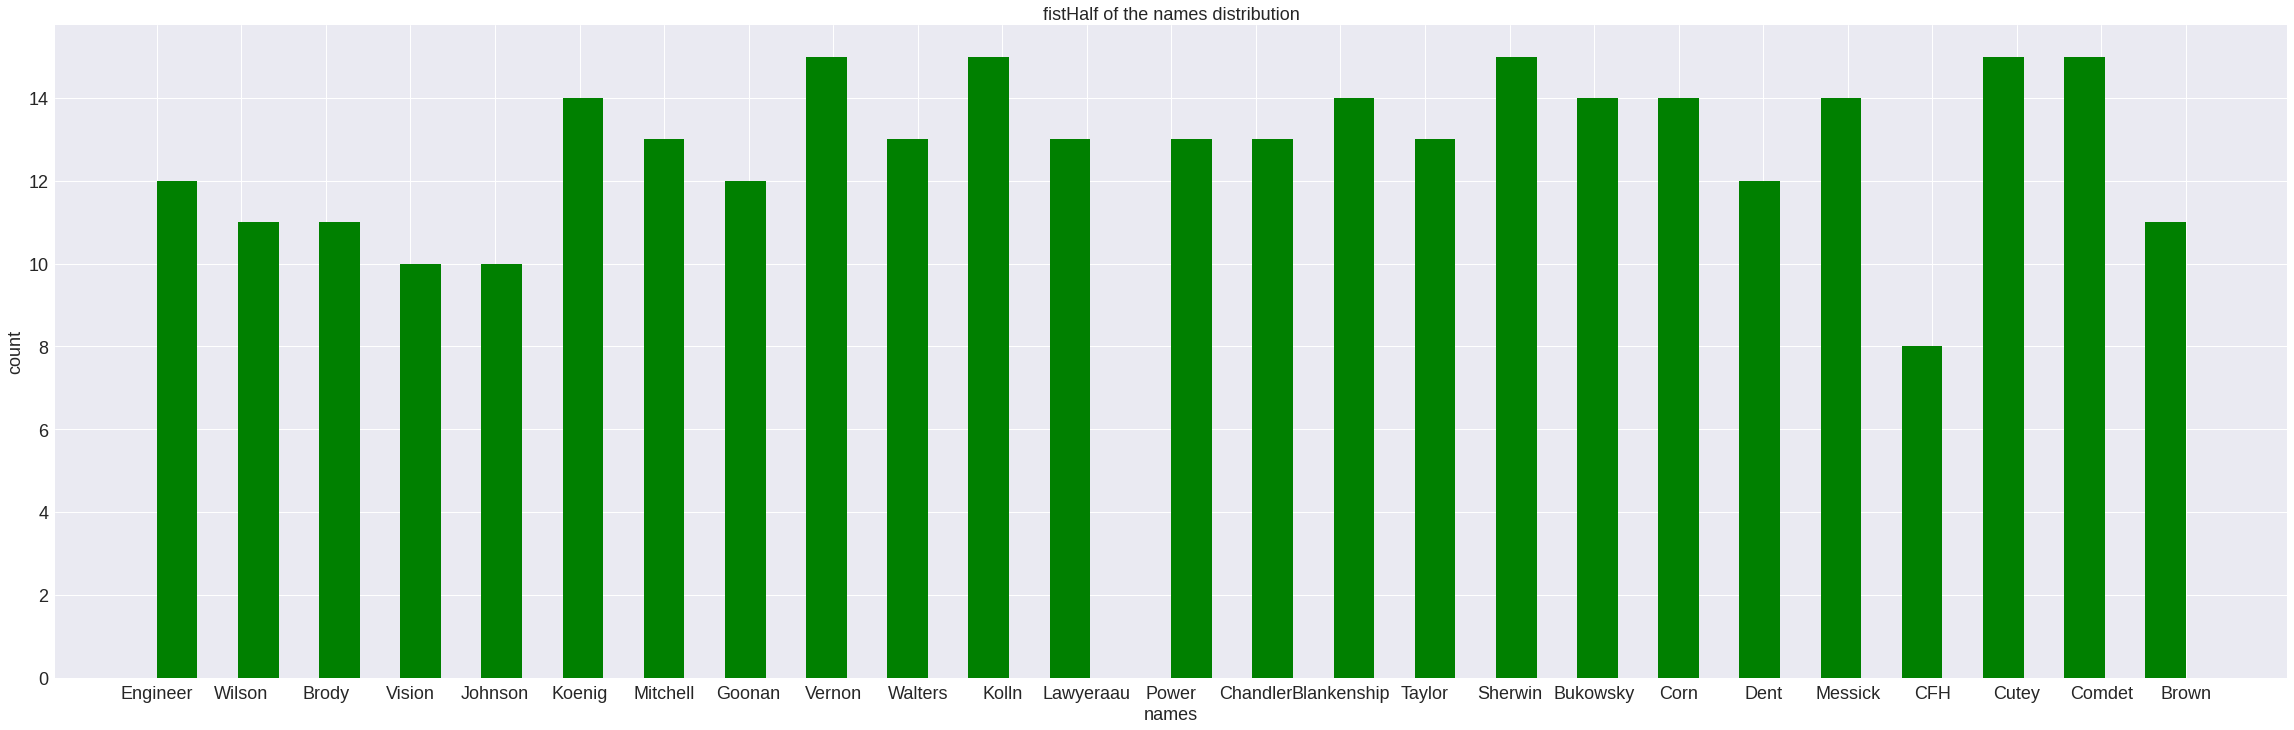

In [8]:
amazon_processor.PlotHist(cleaned,"count","names","fistHalf of the names distribution","fistHalf of the names distribution",50,18)

In [9]:
cleaned = df_train[~df_train['Class'].isin(
["Vernon",         
"Comdet",         
"Sherwin",       
"Cutey",          
"Kolln",          
"Blankenship",    
"Koenig",         
"Messick",        
"Bukowsky",       
"Corn",           
"Lawyeraau",      
"Mitchell",       
"Walters",        
"Chandler",       
"Taylor",         
"Power",          
"Engineer",       
"Dent",           
"Goonan",         
"Brown",          
"Wilson",         
"Brody",          
"Johnson",        
"Vision",         
"CFH"] )]

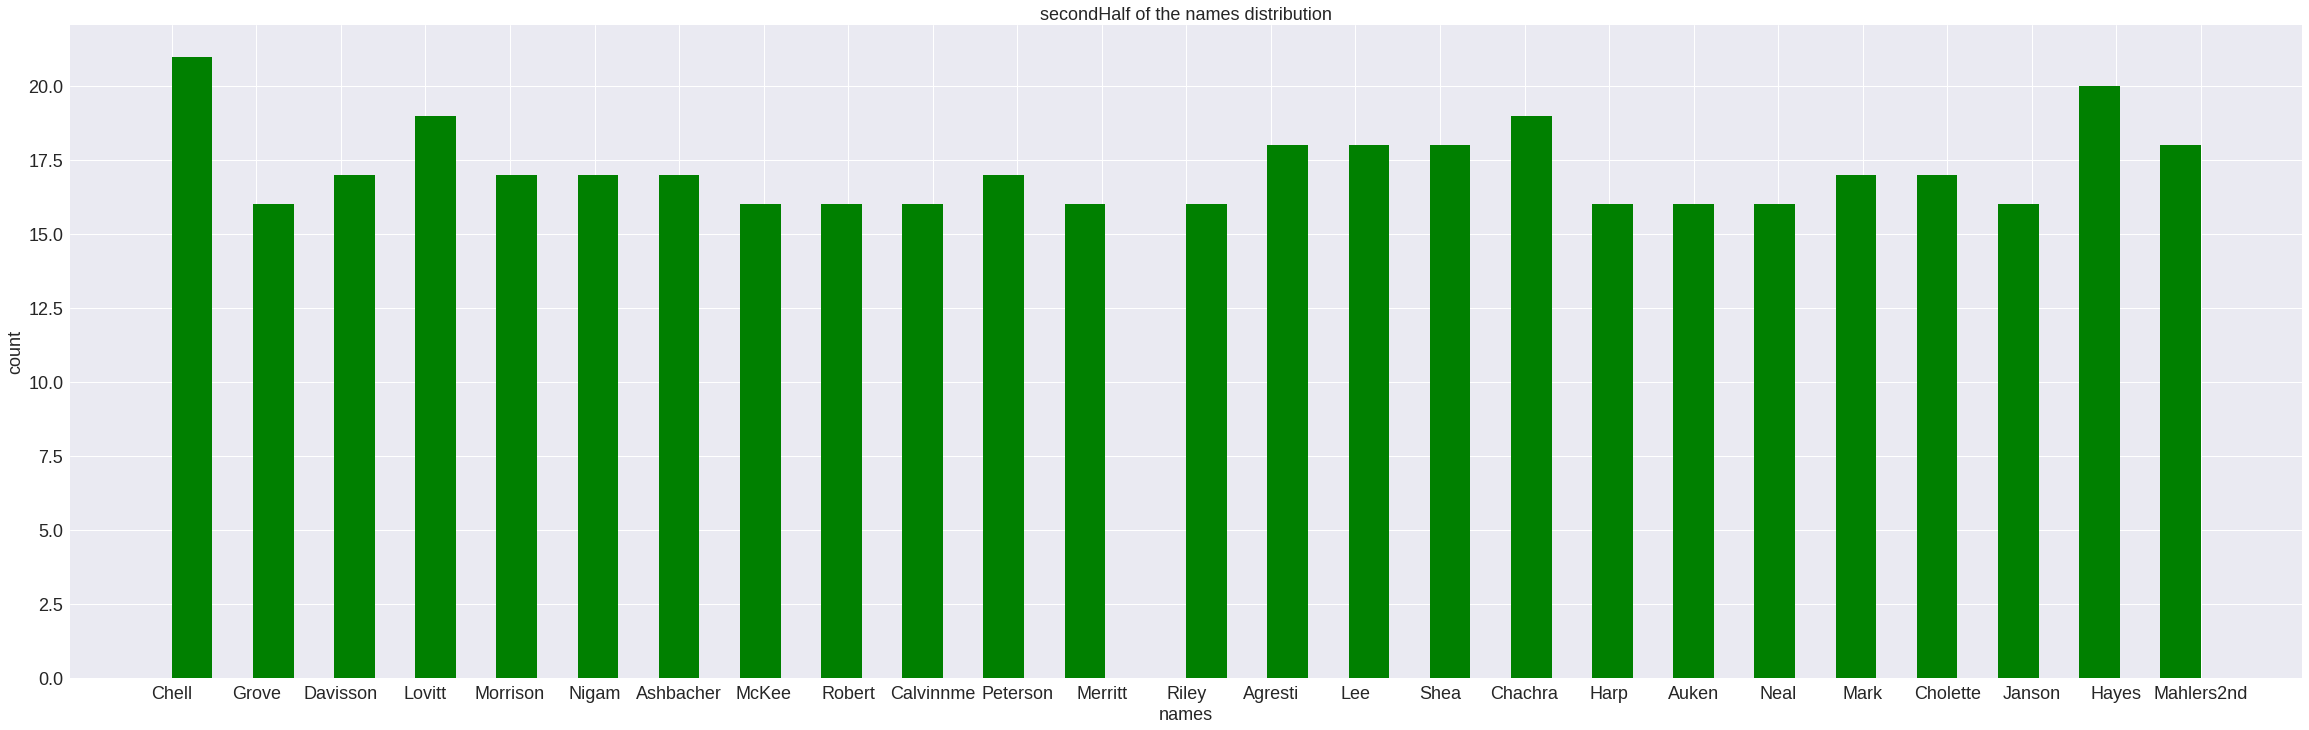

In [10]:
amazon_processor.PlotHist(cleaned,"count","names","secondHalf of the names distribution","secondHalf of the names distribution",50,18)

In [ ]:
#plt.rcParams.update({'font.size': 12})
#mpl.style.use('seaborn')
mpl.style.use('seaborn')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
fig = plt.figure(figsize=(40,12))
#sns.histplot(count_classes,kde = False)
plt.grid()
plt.hist(cleaned["Class"],80,facecolor='g')
def PlotHist(df, xaxis,xlabel,ylabel,title,savename,bins):
    mpl.style.use('seaborn')
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    fig = plt.figure(figsize=(40,12))
    #sns.histplot(count_classes,kde = False)
    plt.hist(cleaned["Class"],80,facecolor='g')
    plt.grid()
    #plt.savefig("Bilder/Class_distribution")
plt.savefig("Bilder/Class_distribution")

In [14]:
feature = df_train.loc[:,'V1':'V10000']
target = df_train.loc[:,'Class':'Class']

In [ ]:
df_train.head()

In [ ]:
pd.unique(target.Class)

In [ ]:
#df_train['V1']=df_train['V1'].astype('category').cat.codes
#df_train['Class']=df_train['Class'].astype('category').cat.codes
#df_train.corr()

# Data preperation

Main goal is to reduce the number of columns to save runtime and computing power

## k-Best method

In [ ]:
k = 3
feature_kb = SelectKBest(chi2, k=k).fit_transform(feature, target)
feature_kb.shape

In [ ]:
sns.pairplot(pd.DataFrame(feature_kb))

## PCA

In [ ]:
pca = PCA(n_components=k)
feature_PCA = pca.fit(feature.values).transform(feature.values)
feature_PCA.shape
pd.DataFrame(feature_PCA)

In [ ]:
sns.pairplot(pd.DataFrame(feature_PCA))

## function outputs

In [11]:
def FeatureSelection_kBest(k):
    return SelectKBest(chi2, k=k)

def FeatureSelection_PCA(k):
    return PCA(n_components=k)


In [15]:
def Preprocessing_Amazon(df_train, df_target, feature_method = "kBest", k = 50, per = 0.8, scale_method = "standard"):
    if(feature_method == "kBest"):
        fea = FeatureSelection_kBest(k)
        df_train = fea.fit_transform(df_train, df_target)
    if(feature_method == "PCA"):
        fea = FeatureSelection_PCA(k)
        df_train = fea.fit(df_train.values).transform(df_train.values)

    if(scale_method == "standard"):
        scl = StandardScaler() 
    if(scale_method == "minmax"):
        scl = MinMaxScaler()
    if(scale_method == "quantil"):
        scl = QuantileTransformer()
    
    scl.fit(df_train)
    df_train = scl.transform(df_train)

    return pd.DataFrame(df_train)

In [16]:
df_preproc = Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = "standard", k = 50)
df_preproc.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.434196,-0.365710,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-0.833586,-0.873198,-0.709898,...,-0.289243,-0.467793,-0.403820,-0.410848,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
1,-0.434196,0.025006,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,0.878090,-0.913092,-1.063932,...,-0.289243,0.377616,-0.403820,-0.410848,-0.446312,0.556373,-0.289262,-0.286022,-0.281361,7.919212
2,0.067571,0.025006,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,0.404322,-0.195001,0.484968,...,-0.289243,-0.467793,1.312129,1.407062,0.436891,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
3,-0.935964,0.025006,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,0.251494,0.084256,0.750493,...,-0.289243,-0.467793,-0.403820,-0.410848,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516
4,-0.434196,-0.756425,-0.089344,-0.113117,-0.087744,-0.06168,-0.072485,-0.084728,-0.394471,0.307951,...,-0.289243,-0.467793,0.454155,0.498107,-0.446312,-0.389839,-0.289262,-0.286022,-0.281361,-0.236516


In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1 = f1_score(y_true, y_pred, average='macro')

from sklearn.metrics import confusion_matrix
import numpy as np

from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print("f1: ", f1, "recall: ", np.mean(recall), "precision: ", np.mean(precision))

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))